<a href="https://colab.research.google.com/github/tec03/continuous_learning/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Roadmap - Linear Regression Analysis

###  **1. Introduction to Regression**

* What is regression? Why use it?
* Simple example: Height vs. Weight
* Theoretical vs. Estimated models
* Key terms: intercept, slope, residuals, error term


### **2. Understanding the Regression Equation**

* Population model vs. sample model
* Components of a regression equation:

  $$
  y = b_0 + b_1 x + \varepsilon
  $$
* What are \$b\_0\$, \$b\_1\$, and \$\varepsilon\$?
* Predicted values vs. observed values


### **3. Key Concepts & Glossary**

* R-squared & Adjusted R-squared
* p-values, t-values, confidence intervals
* AIC, BIC, log-likelihood
* Omnibus, JB, Durbin-Watson statistics


### **4. Assumptions of Linear Regression**

We will explore how to verify all the key assumptions

1. Linearity -  Relationship between predictors and outcome
2. Normality of residuals -  Q-Q plot, histogram
3. No multicollinearity -  VIF analysis
4. Homoscedasticity -  Residuals vs. Fitted, Scale-Location
5. No autocorrelation -  Durbin-Watson test
6. No influential outliers -  Cook’s Distance


### **5. Ordinary Least Squares (OLS) Estimation**

* What does OLS do?
* How it minimizes squared errors
* Fitting a regression line using `statsmodels`


### **6. Data Preprocessing**

* Loading dataset
* Handling missing data (mean/median imputation)
* Type conversion for categorical variables
* Brief Exploratory Data Analysis (EDA)


### **7. Model Building and Evaluation**

* Fitting and Interpreting regression models
 - Simple regression model
 - Multiple regression models with:
  - numerical variables.
  - categorical variables.
  - multiple categorical variables
  - effect of interation



### **8. Diagnostics of a regression model**

* Residuals vs Fitted plot - linearity check
* Scale-Location plot - homoscedasticity
* Q-Q plot - normality check
* Histogram of residuals
* Cook’s Distance plot - influential points


### **9. Final Model Interpretation & Conclusion**

* Summarizing the validity of the model
* Which predictors are significant?
* Are the assumptions satisfied?
* What insights does the model offer?

# Regression - Brief introduction

> Regression analysis is a statistical method used to quantify the strength and nature of the relationship between variables.
  * It enables the prediction of an unknown outcome based on one or more known predictors.
  
 Eg: Height and weight are typically correlated - taller individuals tend to weigh more. Using regression, we can estimate a person's weight given their height by modeling this relationship.



Theoretical Model (Population):

$$
\text{Weight}_i = \beta_0 + \beta_1 \cdot \text{Height}_i + \varepsilon_i
$$

* $\beta_0$: Intercept (weight when height = 0)
* $\beta_1$: True slope (change in weight per unit of height)
* $\varepsilon_i$: Random error

Estimated Model (from Sample):

$$
\hat{\text{Weight}}_i = b_0 + b_1 \cdot \text{Height}_i
$$

* $b_0$: Estimated intercept
* $b_1$: Estimated slope (from your data)


* Use `b` when referring to *estimated coefficients* (what you compute from data).
* Use `β` when referring to *true underlying coefficients* in a population model (theoretical).



**Regression coefficients:**

Certainly! Here's an enriched and well-structured version of your explanation, integrating the regression equation with clear interpretations of each component:

**Components of a Regression Model:**



$$
y_i = \beta_0 + \beta_1 x_i + \varepsilon_i
$$

$$
\hat{\text{Weight}}_i = b_0 + b_1 \cdot \text{Height}_i + \varepsilon_i
$$

where:

1. Dependent Variable ($y_i - \hat{\text{Weight}}_i  $)   

  * Also called the *response* or *target* variable   
  * This is what you are trying to *estimate or predict*    
      * Eg: Predicting *weight* based on *height*
      
2. Independent Variable ($x_i - \text{Height}_i$)   
  * Also called the *explanatory*, *predictor*, or *feature* variable   
  * This is the variable used to *make predictions* about $y$    
    * Eg: *Height* is used to predict *weight*
    
3. Intercept ($\beta_0$)   
  * The *value of $y$* when all predictors are 0   
  * Graphically, it is *where the line crosses the y-axis*   
  
4. Slope Coefficient ($\beta_1$)   
  * Measures the *rate of change* in $y$ for a one-unit increase in $x$   
  * Represents the *angle of the line* (steepness)   
  * Sometimes referred to as *$m$* in the line equation $y = mx + c$
  
5. Error Term ($\varepsilon_i$)   
  * Captures *random noise* or variation in $y$ not explained by $x$   
  * Assumed to be normally distributed with mean zero
  
In practice, we estimate coefficients from data:$$\hat{y}_i = b_0 + b_1 x_i$$
Where:
  * $b_0$ and $b_1$ are *estimates* of the true coefficients $\beta_0$ and $\beta_1$
  * $\hat{y}_i$ is the *predicted value* of the target variable





### Glossary

* R-Squared  (Coefficient of Determination) : Percent of variance explained by the model.
* Adj. R-Squared : R-Squared where additional independent variables are penalized
* F-statistic : Significance of fit Prob (F-statistic): Probability of
seeing F-statistic from a sample
* Log-likelihood: Log of the likelihood function
* AIC: Akaike Information Criterion, penalizes model when more independent variables are added.
* BIC: Bayesian Information Criterion, similar to AIC but with higher penalties
* coef: Estimated coefficient value
* std err: Standard error of the coefficient estimate
* t: Measure of statistical significance for coefficient
* P>|t|: Probability value that the coefficient is equal to 0
* [0.xxxx 0.xxxx]: Lower and upper halves of 95% confidence interval

* Omnibus: Omnibus D’Angostino’s test, statistical test for skewness and kurtosis
* Prob(Omnibus): Omnibus statistic as a probability
* Skew: Measure of data mean symmetry
* Kurtosis: Measure of shape of the distribution
* Durbin-Watson: Test for autocorrelation
* Jarque-Bera (JB): Test for skewness & kurtosis
* Prob (JB): Jarque-Bera statistic as a probability
* Cond. No.: Test for multicollinearity

Your explanation is very good and informative! Here's an improved and more polished version for clarity, academic tone, and precision. I’ve adjusted grammar, structure, and phrasing, while preserving all your key ideas:



#### Assumptions of Linear Regression

Linear regression is a *parametric technique*, meaning it estimates parameters (coefficients) based on observed data. To ensure valid inference and accurate predictions, certain assumptions must be satisfied.

> These assumptions are **necessary but not sufficient** for model reliability.
  * If violated, the results **may become biased or misleading**, though not always.



1. **Linearity**

  There must be a **linear relationship** between the independent variable(s) ($x$) and the dependent variable ($y$).

  * How to check?

    * Use a *scatter plot* to visualize the relationship.
    * A straight-line pattern supports this assumption.



2. **Normality of Residuals**

  The *residuals* (errors between actual and predicted values) should be *normally distributed*.

  * How to check?

    * *Histogram* of residuals
    * *Q-Q plot* (quantile-quantile plot)
    * *Jarque–Bera (JB) test*: A formal statistical test of normality
    [Docs – statsmodels Jarque–Bera test](https://www.statsmodels.org/stable/generated/statsmodels.stats.stattools.jarque_bera.html)



3. **No (or Little) Multicollinearity**

  The independent variables should not be highly correlated with each other.

  * How to check?

    * *Pair plots* or *correlation heatmaps*
    * *Variance Inflation Factor (VIF)*

    * Rule of thumb: *VIF > 5* may indicate problematic multicollinearity.

  **Why it matters:**
  For instance, if `height` and `salary` are highly correlated, we cannot isolate the unique effect of `height` on the response variable (e.g., `health`).



4. **Homoscedasticity**

  The *variance of residuals* should remain **constant** across all levels of the independent variables.

  * How to check?

    * Plot **residuals vs. fitted values**
        - look for a consistent spread (no "fan shape" - fan out).
    * Breusch–Pagan test: A formal test for heteroscedasticity

      * A *very small p-value* indicates a violation of homoscedasticity.



5. **No Autocorrelation of Residuals**

  The residuals should be *independent* from one another (i.e., no pattern or time-related structure).

  * How to check?

    * Plot the residuals over time to look for patterns.
    * Durbin–Watson (DW) test:

      * *DW ≈ 2.0*: No autocorrelation
      * *DW < 1.5*: Positive autocorrelation
      * *DW > 2.5*: Negative autocorrelation

### Ordinary Least Squares (OLS)

Ordinary Least Squares (OLS) is a fundamental method in linear regression. It estimates the best-fitting line by minimizing the **sum of squared residuals**—the differences between actual and predicted values.

* The **residual (error)** is defined as:

  $$
  \text{error} = y_{\text{actual}} - y_{\text{predicted}}
  $$

* The errors are **squared** to:

  * Avoid negative/positive cancellation.
  * Penalize larger errors more heavily.

The model chooses the coefficients that **minimize the total squared error**, yielding the "best" linear fit under the OLS criterion.



**Important Considerations:**

* Linear regression involves **estimation**
  - we estimate parameters (coefficients) from the sample data.
* The goal is to find a line that **best describes the relationship** between the dependent and independent variables.
* In notation, estimations are often represented with a **hat** (^) symbol.

  $$
  \hat{y} = \beta_0 + \beta_1 x
  $$



**Python Libraries for Regression:**

We commonly use two Python packages for regression analysis, each with its own advantages:

`statsmodels`

* Designed for **statistical inference** and **model diagnostics**.
* More transparent and mathematically detailed outputs
  - e.g., p-values, confidence intervals.
* Preferred for academic, research, or statistics-heavy applications.

`scikit-learn`

* Geared toward **machine learning** and predictive modeling.
* Excellent for tasks involving:

  * Cross-validation
  * Pipeline building
  * Model evaluation with metrics like MAE, MSE, and R²
* Best suited for production-grade ML systems.

### Defining the style dictionaries

In [1]:
heatmap_options = {
    "annot": True,
    "linewidth": 0.5,
    "cmap": "Reds",
    "annot_kws": {"size": 17},
    "cbar_kws": {"orientation": "horizontal"}
}

tick_options_x = {
    "fontsize": 17,
    "rotation": 15
}

tick_options_y = {
    "fontsize": 17,
    "rotation": 15
}

tick_params_x = {
    "top": True,
    "labeltop": True,
    "labelbottom": False
}

tick_params_y = {
    "right": True,
    "labelleft": False,
    "labelright": True
}


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import linear_model


### **1. Data Import, Cleaning, and Preliminary Exploration**

This section involves:

* **Reading the dataset** into the analysis environment.
* **Cleaning the data** by handling missing values, correcting data types, and ensuring consistency.
* Performing **initial assessments**, such as viewing descriptive statistics, checking data structure, and identifying potential issues or patterns that may influence modeling.



In [3]:
path = 'https://raw.githubusercontent.com/tec03/Datasets/main/datasets/reg_data.csv'
df = pd.read_csv(path)
df

,Gender,Age,Place,Weight,Company,Education,JoinYear,Salary
0,Male,58.0,NaN,70.7,GM,Master,2006.0,74862.0
1,Female,56.0,1.0,65.9,BMW,Master,2021.0,60652.0
2,Male,54.0,2.0,88.9,BMW,PhD,2011.0,65058.0
3,Male,26.0,3.0,63.2,Tesla,PhD,2016.0,46284.0
4,Male,49.0,4.0,60.9,GM,Master,2012.0,60945.0
...,...,...,...,...,...,...,...,...
145,Male,32.0,4.0,69.5,GM,NaN,2013.0,56127.0
146,Male,29.0,2.0,NaN,Tesla,Master,2018.0,51189.0
147,Male,57.0,2.0,81.4,BMW,PhD,NaN,NaN
148,Male,59.0,3.0,51.0,BMW,Bachelor,NaN,65600.0


In [4]:
# Summarize missing values
missing_summary = df.isnull().sum().to_frame(name="Missing Values")
missing_summary

,Missing Values
Gender,14
Age,9
Place,14
Weight,15
Company,13
Education,15
JoinYear,15
Salary,15


In [5]:
missing_summary["%Missing"] = ((missing_summary["Missing Values"] / len(df))*100).round(2)
missing_summary.sort_values("Missing Values",
                            ascending=False
                            )

,Missing Values,%Missing
Weight,15,10.00
Salary,15,10.00
JoinYear,15,10.00
Education,15,10.00
Gender,14,9.33
Place,14,9.33
Company,13,8.67
Age,9,6.00


Observations and Recommended Actions:

1. Numeric Variables (`Age`, `Weight`, `JoinYear`, `Salary`):

  * Impute with **mean** (default) or **median** if skewed:


2. Categorical Variables:

  * Impute with *mode* (most frequent value) for:

  * `Education`
  * `Gender`
  * `Place`
  * `Company`


Why Not Drop Rows?

* We have \~10% missingness across several columns.
* Dropping rows would remove *too much data*, reducing sample size and statistical power.
* Imputation is more appropriate unless missingness is completely random *and* sample size is large.

Choosing *mean vs. median* for imputing missing values depends on the *distribution and characteristics of the data*.

Use *Mean* when:

* The distribution is approximately *normal*.
* There are *no strong outliers*.
  * Eg: `Weight` often clusters normally around the average.

Use *Median* when:

* The data is *skewed* (left or right).
* There are *extreme outliers* that would distort the mean.
  * Eg: `Salary` or `Age` might be skewed due to a few very high earners or senior individuals.

Practically:

1. Plot a histogram:

2. Compare mean and median:

   * If mean ≈ median : normal - use *mean*
   * If mean ≠ median : skewed - use *median*

In [6]:
df.describe().loc[['mean', '50%'], :]

,Age,Place,Weight,JoinYear,Salary
mean,40.404255,2.514706,70.068889,2010.037037,60595.903704
50%,41.000000,2.000000,69.600000,2010.000000,60945.000000


In [7]:
#MEAN or MEDIAN for numerical
df["Age"] = df["Age"].fillna(df["Age"].mean())

df["Weight"] = df["Weight"].fillna(df["Weight"].mean())

df["JoinYear"] = df["JoinYear"].fillna(df["JoinYear"].mean())

df["Salary"] = df["Salary"].fillna(df["Salary"].median())

#MODE for categorical
for col in ["Education", "Gender", "Place", "Company"]:
    df[col] = df[col].fillna(df[col].mode()[0])

df.isnull().sum().to_frame(name='MissingValues')

,MissingValues
Gender,0
Age,0
Place,0
Weight,0
Company,0
Education,0
JoinYear,0
Salary,0


In [8]:
df.columns

Index(['Gender', 'Age', 'Place', 'Weight', 'Company', 'Education', 'JoinYear',
       'Salary'],
      dtype='object')

The varialbes 'Place', and 'JoinYear' should be categorical.

In [9]:
df['Place'] = df['Place'].astype('category')
df['JoinYear'] = df['JoinYear'].astype('category')

In [10]:
df['Place'][0] # will still return the original type (float), not category wrapper

np.float64(2.0)

In [11]:
df['Place'].dtype         # should say 'category'

CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0], ordered=False, categories_dtype=float64)

In [12]:
df['Place'].cat.categories  # list of unique levels

Index([1.0, 2.0, 3.0, 4.0], dtype='float64')

In [13]:
favs = ['Age',  'Weight', 'Salary'] #only numerical variables to calculate correlation.
ndf = df[favs]
ndf.corr()

,Age,Weight,Salary
Age,1.000000,0.003439,0.742369
Weight,0.003439,1.000000,0.183085
Salary,0.742369,0.183085,1.000000


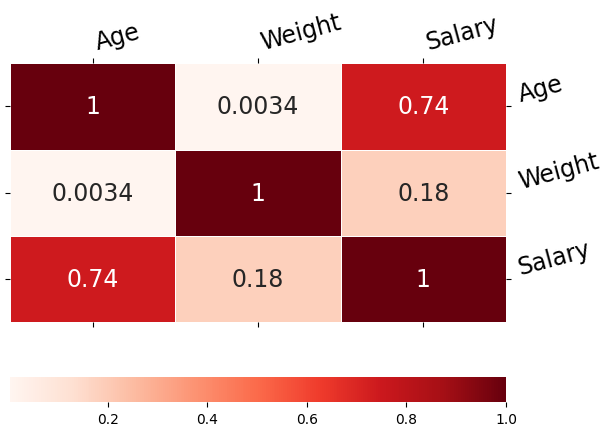

In [14]:
fig, ax = plt.subplots()#figsize=(8, 7))

hm = sns.heatmap(ndf.corr(),
                 ax=ax,
                 **heatmap_options
                 )


ax.set_xticklabels(ax.get_xmajorticklabels(),
                   **tick_options_x
                   )
ax.set_yticklabels(ax.get_ymajorticklabels(),
                   **tick_options_y
                   )


ax.tick_params(axis='x',
               **tick_params_x
               )
ax.tick_params(axis='y',
               **tick_params_y
               )

# Align labels
for label in ax.get_xticklabels():
    label.set_ha('left')
for label in ax.get_yticklabels():
    label.set_va('bottom')


Observations:

1. Salary vs. Age: Strong Positive Correlation (\~0.80):

  * This is high and meaningful.
  * Indicates that *as age increases, salary tends to increase*, likely because older employees have more experience.
  * This makes `Age` a *very good predictor* for your regression model.

2. Salary vs. Weight: Weak Positive Correlation (\~0.20)

  * This is *very weak* and might not contribute much explanatory power.
  * Still, it doesn’t hurt to include it unless it causes noise or multicollinearity (which it doesn’t here).

3. Age vs. Weight: No Correlation (\~0.00)

  * This is ideal in terms of *multicollinearity*.
  * It means you can include both `Age` and `Weight` in the model *without worrying* about them interfering with each other.


Keep in mind:
  
  If we want to improve the model later, we might want to try feature engineering or include variables like `Education` or `JoinYear` or other variables as well.


### **2. Simple regression (Only one regressor)**

1. How does a person’s age affect their salary?
2. What is the salary of a person with age 33 ?

How do we answer that question with a model?

We use a *linear regression model* to express the relationship:

$$
\text{Salary}_i = \beta_0 + \beta_1 \cdot \text{Age}_i + \varepsilon_i
$$



* $\text{Salary}_i$: The salary of person $i$
* $\text{Age}_i$: The age of person $i$
* $\beta_0$: The *intercept* - the model’s estimated salary when age is 0
* $\beta_1$: The *slope* - how much salary is expected to change with each additional year of age
* $\varepsilon_i$: The *error term* - the part of salary not explained by age

What are we trying to learn?

We want to *estimate* the unknown parameters $\beta_0$ and $\beta_1$. Once we do that, we get:

$$
\widehat{\text{Salary}}_i = b_0 + b_1 \cdot \text{Age}_i
$$

where:

* $b_0$ is our estimate of $\beta_0$
* $b_1$ is our estimate of $\beta_1$
* $\widehat{\text{Salary}}_i$ is the *predicted salary* for person $i$

Note:
  Shold have a clean Input. Input with NaN,leads to error.

In [15]:
df.isnull().any()

,0
Gender,False
Age,False
Place,False
Weight,False
Company,False
Education,False
JoinYear,False
Salary,False


#### **2.1. Simple regression (Only one regressor)**


$$
\widehat{\text{Salary}}_i = b_0 + b_1 \cdot \text{Age}_i
$$

Here we use

```
  from sklearn import linear_model
```

In [16]:
X = pd.DataFrame(df['Age'])
y = pd.DataFrame(df['Salary'])

modelA = linear_model.LinearRegression().fit(X, y)
modelA

LinearRegression()

In [17]:
print('The intercept is \t :\t',         modelA.intercept_)
print('The coefficients are \t : \t',    modelA.coef_)
print('Model score (R-squared) is : \t', modelA.score(X, y))

The intercept is 	 :	 [43276.39873912]
The coefficients are 	 : 	 [[429.51947653]]
Model score (R-squared) is : 	 0.551112401214503


In [18]:
a = input('Please provide the Age of the person whose salary needs to be predicted:')
print(f'You have entered \t: {a}' )


Please provide the Age of the person whose salary needs to be predicted:58
You have entered 	: 58


$$
\widehat{\text{Salary}}_i = b_0 + b_1 \cdot \text{Age}_i
$$

In [19]:
intercept = modelA.intercept_.item()  # extract scalar safely
coef = modelA.coef_.item()            # extract scalar safely

print(f'Predicted salary for Age {a} is ',
      round(intercept + coef * float(a), 2)
      )

Predicted salary for Age 58 is  68188.53


In [20]:
age_input_df = pd.DataFrame({"Age": [float(a)]})
predicted_salary = modelA.predict(age_input_df).item()


print(f'Predicted salary for Age {a} is ', round(predicted_salary, 2))

Predicted salary for Age 58 is  68188.53


In [21]:
age58 = df.Age == 58
df[age58][['Age', 'Salary']]

,Age,Salary
0,58.0,74862.0
13,58.0,70822.0
37,58.0,71303.0
65,58.0,70089.0
134,58.0,71208.0


These are the true / observed values, corresponding to the predicted value.

#### **2.2. Simple regression (Only one regressor)**


$$
\widehat{\text{Salary}}_i = b_0 + b_1 \cdot \text{Age}_i
$$

Here we use

```
import statsmodels.api as sm
import statsmodels.formula.api as smf
```


* OLS.from_formula

In [22]:
modelB = smf.ols('Salary ~ Age',
                 data=df
                 ).fit()
modelB.summary()

#OR
# modelB = sm.OLS.from_formula("Salary ~ Age",
#                               data=df
#                              ).fit()
# modelB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     181.7
Date:                Fri, 30 May 2025   Prob (F-statistic):           1.59e-27
Time:                        16:11:28   Log-Likelihood:                -1472.0
No. Observations:                 150   AIC:                             2948.
Df Residuals:                     148   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.328e+04   1337.787     32.349      0.000    4.06e+04    4.59e+04
Age          429.5195     31.864     13.480      0.000     366.552     492.487
==============================================================================
Omnibus:                        6.089   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                5.642
Skew:                           0.440   Prob(JB):                       0.0595
Kurtosis:                       3.359   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Kurtosis:
  *  measures extreme values in either tail
  *  is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution.
  *  identifies whether the tails of a given distribution contain extreme values.
  * `kurtosistest` test whether a dataset has normal kurtosis
    - This function tests the null hypothesis that the kurtosis of the population from which the sample was drawn is that of the normal distribution.

In [23]:
modelB.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4.328e+04,1337.787,32.349,0.000,4.06e+04,4.59e+04
Age,429.5195,31.864,13.480,0.000,366.552,492.487


Interpretation:

1. Intercept (`b0` = 43280)

  * This is the estimated *salary* when Age has no impact on the Salary.


2. Age Coefficient (`b1` = 429.52)

  * For *each additional year of age*, the model predicts an *increase of approximately 430 units in Salary*.
  * The effect is *positive and statistically significant*.

3. Statistical Significance

  * *P-values* for both terms are 0.000, meaning:
    * The intercept and Age are *highly statistically significant* (p < 0.05).
    * There’s *strong evidence* that Age has a real impact on Salary in the population.

4. *t-values* are very high:

  * t = 13.48 for Age - very strong predictor.
  * This supports the low p-value conclusion.

  In a regression model, the *t*-value for each coefficient tests the *null hypothesis* that the coefficient is *equal to 0* (i.e., no effect).

$$
t = \frac{\text{Coefficient estimate}}{\text{Standard Error}}
$$

  How to interpret the size of the *t*-value

 **t-value size** | **Interpretation**                                         |
---------------- | ---------------------------------------------------------- |
**0 to ±2**      | Not statistically significant (likely due to random noise) |
**±2 to ±3**     | Possibly significant; borderline depending on sample size  |
**> ±3**         | Statistically significant at **p < 0.01** or better        |
**> ±10**        | Extremely strong evidence; almost certainly a real effect  |

In our model:

  - `t = 13.48` for `Age`
    * A *very small p-value* (0.000),
    * *Strong evidence* that `Age` is associated with `Salary`.



> For a *two-tailed test*, with a decent sample size (n > 30):

* If |t| > *2*, it’s significant at the *5% level*
* If |t| > *2.6*, it's significant at the *1% level*
* If |t| > *3.3*, it's significant at the *0.1% level*



5. Confidence Interval for `Age` (366.55 to 492.49).

  * With 95% confidence, the *true effect* of age on salary lies between *366 and 492*.
  * This interval *does not include zero*, reinforcing statistical significance.


The degrees of freedom (df) of the residuals in a linear regression model represent the number of independent pieces of information used to estimate the variance of the residuals.
  - It is calculated as the difference between the number of observations and the number of parameters estimated in the model (including the intercept).

$$df_{resid} = n - p$$

where:
- $ n $ is the number of observations (rows in your dataset).
- $ p $ is the number of parameters estimated, including the intercept.

```python
resultA.df_resid
```

What does `df_resid = n - p` represent?

1. Estimation of Error Variance:

  You can't compute the true variance of residuals, but you can estimate it using:

$$
\hat{\sigma}^2 = \frac{\text{RSS}}{df_{resid}} = \frac{\sum (y_i - \hat{y}_i)^2}{n - p}
$$

  Where:

  * $\text{RSS}$: residual sum of squares


2. Inference: t-tests and p-values:

  * When checking if a coefficient is significantly different from 0 (e.g., is age affecting salary?), you compute a **t-statistic**.
  * The **p-value** is computed based on a *t-distribution with df = df\_resid*.

This allows you to make **statistical conclusions** about the significance of predictors.

3. Confidence Intervals for Coefficients:

  * Confidence intervals for $\beta_1$ and $\beta_0$ depend on the estimated standard errors.
  * Standard errors depend on the **estimated variance of residuals**, which in turn depends on `df_resid`.

  So your *confidence intervals become wider or narrower* based on how many degrees of freedom you have.

4. Model Diagnostics and F-statistic:

  * The *F-statistic* for testing the overall model fit also uses `df_resid` (in denominator).
  * The more data you have relative to parameters (i.e., larger `df_resid`), the more stable and powerful your statistical tests are.


In [24]:
params = modelB.params          # Coefficients (including the intercept)
intercept = params['Intercept'] # Intercept (constant term)
coef_age = params['Age']        # Coefficient for the "Age" variable

print(f"Intercept\t\t: {intercept}")
print(f"Coefficient for Age\t: {coef_age}")


Intercept		: 43276.398739116965
Coefficient for Age	: 429.5194765287892


In [25]:
params

,0
Intercept,43276.398739
Age,429.519477


In [26]:
modelB.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4.328e+04,1337.787,32.349,0.000,4.06e+04,4.59e+04
Age,429.5195,31.864,13.480,0.000,366.552,492.487


In [27]:
a = input('Please provide the Age of the person whose salary needs to be predicted: ')
print(f'You have entered \t: {a}' )

Please provide the Age of the person whose salary needs to be predicted: 58
You have entered 	: 58


In [28]:
print(f'Age of the person with Age {a} is ', intercept + coef_age*float(a) )

Age of the person with Age 58 is  68188.52837778674


Let's analyse what we have done so far. For, create a study DataFrame combining actual, predictor, fitted and residuals.

In [29]:
study_df = pd.DataFrame({
    "Actual_Salary": df["Salary"],
    "Age": df["Age"],
    "Predicted_Salary": modelB.fittedvalues,
    "Residual": modelB.resid,
    "Difference": df["Salary"] - modelB.fittedvalues,
}).round(2)

study_df.head()


,Actual_Salary,Age,Predicted_Salary,Residual,Difference
0,74862.0,58.0,68188.53,6673.47,6673.47
1,60652.0,56.0,67329.49,-6677.49,-6677.49
2,65058.0,54.0,66470.45,-1412.45,-1412.45
3,46284.0,26.0,54443.91,-8159.91,-8159.91
4,60945.0,49.0,64322.85,-3377.85,-3377.85


In [30]:
slope = 0.43
print(slope)
angle_deg = np.degrees(np.arctan(slope))
angle_deg

0.43


np.float64(23.26770481005695)

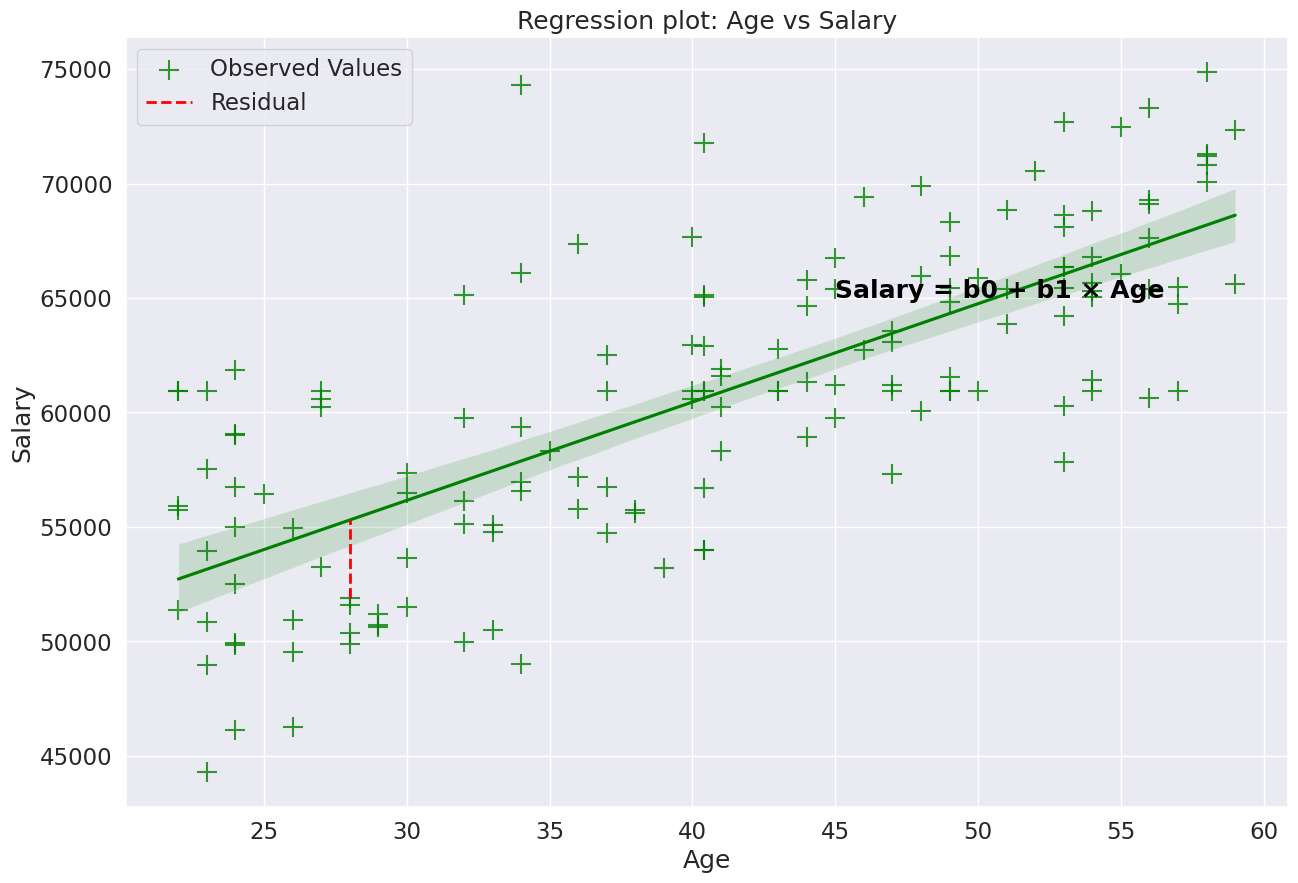

In [31]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)


ax = sns.regplot(
    x='Age',
    y='Actual_Salary',
    data=study_df,
    color='green',
    marker='+',
    scatter_kws={'s': 200},
    label='Observed Values'  # required for legend
)

# Axis labels
ax.set(xlabel='Age',
       ylabel='Salary')
ax.set_title('Regression plot: Age vs Salary')


ax.text(
    45, 65000,
    'Salary = b0 + b1 × Age',
    horizontalalignment='left',
    size='medium',
    color='black',
    weight='semibold'
)

# Add residual for a selected point ( 5)
i = 5
x_val = study_df.loc[i, 'Age']
y_actual = study_df.loc[i, 'Actual_Salary']
y_pred = modelB.predict({'Age': [x_val]}).item()

# Draw residual as a vertical line
ax.vlines(x=x_val,
          ymin=min(y_actual, y_pred),
          ymax=max(y_actual, y_pred),
          color='red',
          linestyle='--',
          linewidth=2,
          label='Residual'
          )


ax.legend()
plt.show()


####  Case studies

**Case1**

What is the `Salary` of a person with age 58 ?

Here DF = 1.

In [32]:
age = float(input('Age of the person is \t : '))
print(f'You want to knwo the salary of person with age\t:  {age}')

Age of the person is 	 : 58
You want to knwo the salary of person with age	:  58.0


In [33]:
salary = modelB.params.Intercept + modelB.params.Age * age
print(f"A person with Age {age} has a salary of \t {salary:.2f}")

study_df.iloc[:1,:]

A person with Age 58.0 has a salary of 	 68188.53


,Actual_Salary,Age,Predicted_Salary,Residual,Difference
0,74862.0,58.0,68188.53,6673.47,6673.47


In [34]:
print(modelB.params.Intercept.round(2))
print(modelB.params.Age.round(2) )

43276.4
429.52


**Conclusion:**

Salary = 43276.4 + 429.52*58  
Slary of a person with age 58 is : 68188.53


In [35]:
resiB = modelB.resid
resiB

,0
0,6673.471622
1,-6677.489425
2,-1412.450472
3,-8159.905129
4,-3377.853089
...,...
145,-894.021988
146,-4543.463558
147,-6814.008901
148,-3018.047854


In [36]:
resiB.describe()

,0
count,1.500000e+02
mean,-2.900682e-11
std,4.437564e+03
min,-8.885061e+03
25%,-3.192204e+03
50%,-1.624375e+02
75%,2.704351e+03
max,1.643894e+04


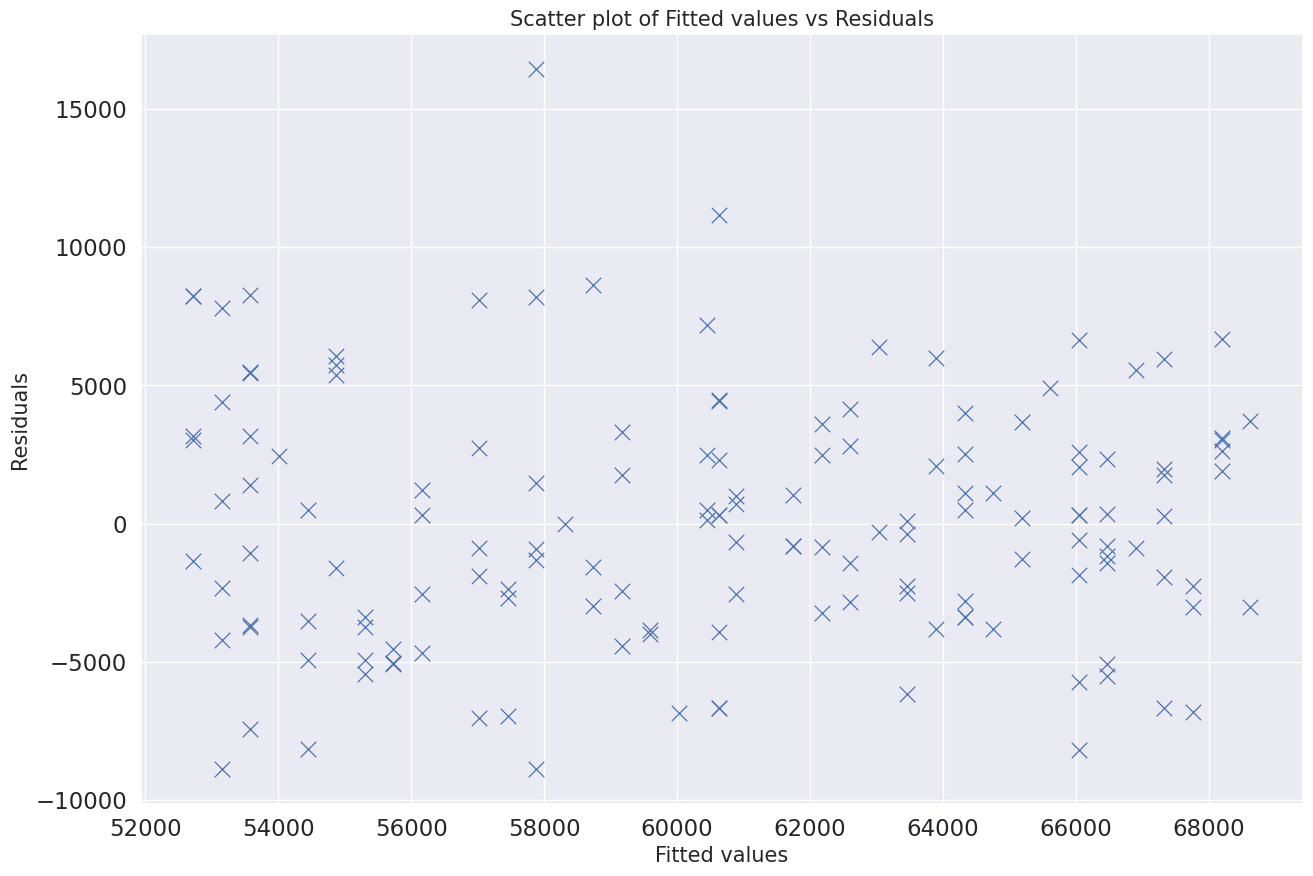

In [37]:
plt.figure(figsize=(15, 10))

pp = sns.scatterplot(x = modelB.fittedvalues,
                     y = resiB,
                     marker='x',
                     s=125,#size of markers
                     #facecolor = 'b'
                    )



pp.set_xlabel("Fitted values", size = 15)
pp.set_ylabel("Residuals", size = 15)
pp.set_title("Scatter plot of Fitted values vs Residuals", size = 15)
plt.show()

Note:

It remains to validate all the asumptions. For the moment we skip for a bigger model.

#### **2.3. Multiple Linear Regression with a Categorical Variable**

We are modeling *Salary* based on *Age* and *Gender*:

Model 1: Conceptual Form:

$$
\text{Salary} = \beta_0 + \beta_1 \cdot \text{Age} + \beta_2 \cdot \text{Gender}
$$

Where:

* `Gender` is a *categorical variable* (Male &  Female)



In practice, `statsmodels` or `pandas.get_dummies()` will use *dummy variables* for categorical data:

$$
\text{Salary} = \beta_0 + \beta_1 \cdot \text{Age} + \beta_2 \cdot \text{Male}
$$

In [38]:
modelAG = smf.ols("Salary ~ Age + Gender",
                  data=df
                  ).fit()
modelAG.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     91.38
Date:                Fri, 30 May 2025   Prob (F-statistic):           1.62e-26
Time:                        16:11:38   Log-Likelihood:                -1471.5
No. Observations:                 150   AIC:                             2949.
Df Residuals:                     147   BIC:                             2958.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.363e+04   1382.279     31.563      0.000    4.09e+04    4.64e+04
Gender[T.Male]  -745.3218    736.862     -1.011      0.313   -2201.532     710.889
Age              428.5482     31.876     13.444      0.000     365.554     491.543
==============================================================================
Omnibus:                        4.971   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.516
Skew:                           0.406   Prob(JB):                        0.105
Kurtosis:                       3.252   Cond. No.                         162.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
print('Model Parameters \n', modelAG.params)
print('\n\nModel Intercept\t\t:',modelAG.params.Intercept)
print('Coefi. of Gender1\t:', modelAG.params['Gender[T.Male]'])
print('Coef. of Age \t\t: ', modelAG.params.Age)

Model Parameters 
 Intercept         43628.679563
Gender[T.Male]     -745.321764
Age                 428.548151
dtype: float64


Model Intercept		: 43628.67956322245
Coefi. of Gender1	: -745.3217641752437
Coef. of Age 		:  428.5481510374041


* Salary  = b0 + b1* Age + b2* Gender

* Salary  = b0 + b1* Age + b2* Male

`Males` have $ b2 more salary than of `Females` of same category (Age).

In [40]:
predicted = modelAG.fittedvalues
residuals = modelAG.resid
diff = df['Salary'] - predicted


study_df = pd.concat([df['Salary'],
                      df['Age'],
                      df['Gender'],
                      predicted,
                      residuals,
                      diff
                      ], axis=1
                     )

# Rename columns
study_df.columns = ['Salary', 'Age', 'Gender', 'Predicted', 'Residual', 'Difference']
study_df


,Salary,Age,Gender,Predicted,Residual,Difference
0,74862.0,58.0,Male,67739.150559,7122.849441,7122.849441
1,60652.0,56.0,Female,67627.376021,-6975.376021,-6975.376021
2,65058.0,54.0,Male,66024.957955,-966.957955,-966.957955
3,46284.0,26.0,Male,54025.609726,-7741.609726,-7741.609726
4,60945.0,49.0,Male,63882.217200,-2937.217200,-2937.217200
...,...,...,...,...,...,...
145,56127.0,32.0,Male,56596.898632,-469.898632,-469.898632
146,51189.0,29.0,Male,55311.254179,-4122.254179,-4122.254179
147,60945.0,57.0,Male,67310.602408,-6365.602408,-6365.602408
148,65600.0,59.0,Male,68167.698710,-2567.698710,-2567.698710


####  Case study:

What is the Salary of a Male person with age 58?

**Salary = 749.8157 + 34.2211* Age + 306.7169* Male**

Df Model: 2. So we need 2 information to find the salary of a person.

In [41]:
age = int(input('Enter age of the person:\t'))
gen = int(input('Is it a Male (enter 1 if yes, 0 otherwise:)\t'))

Enter age of the person:	58
Is it a Male (enter 1 if yes, 0 otherwise:)	1


In [42]:
gender = 'Male' if gen == 1 else 'Female'
print(f"Age\t: {age}\nGender\t: {gender}")

Age	: 58
Gender	: Male


In [43]:
predicted_val = modelAG.params.Intercept + modelAG.params['Gender[T.Male]'] * gen + modelAG.params.Age * age
predicted_val

np.float64(67739.15055921665)

In [44]:
print('salary of a {} of age {} is = {}'.format(gender, age, predicted_val))
ms = predicted_val

salary of a Male of age 58 is = 67739.15055921665


**case2:** Age = 58; Male = False

In [45]:
age = int(input('Enter age of the person:\t'))
gen = int(input('Is it a Male (enter 1 if yes, 0 otherwise:)\t'))
gender = 'Male' if gen == 1 else 'Female'
print(f"Age\t: {age}\nGender\t: {gender}")
predicted_val = modelAG.params.Intercept + modelAG.params['Gender[T.Male]'] * gen + modelAG.params.Age * age
print('salary of a {} of age {} is = {}'.format(gender, age, predicted_val))
fs = predicted_val

Enter age of the person:	58
Is it a Male (enter 1 if yes, 0 otherwise:)	1
Age	: 58
Gender	: Male
salary of a Male of age 58 is = 67739.15055921665


In [46]:
print('The difference is \t\t:', ms - fs)
print('Coefficient of Gender is \t:', modelAG.params['Gender[T.Male]'])

The difference is 		: 0.0
Coefficient of Gender is 	: -745.3217641752437


Observations:

The regression model's estimate of the gender effect perfectly matches the observed difference in your data:

* `Gender[T.Male] = -745.32`
* This means that, *on average*, *males earn \$745.32 less* than females, after controlling for age.

Interpretation:

* `Gender[T.Male]` is a dummy variable (1 for Male, 0 for Female).

* The model equation is:

  $$
  \text{Salary} = \beta_0 + \beta_1 \cdot \text{Age} + \beta_2 \cdot \text{Male}
  $$

* Since β₂ = -745.32, the model predicts:

  > At any fixed age, *a male earns \$745.32 less* than a female.

Insight:

If your data is **balanced and age is not strongly correlated with gender**, then the model's coefficient will be **very close** to the raw average difference (as you're seeing here).


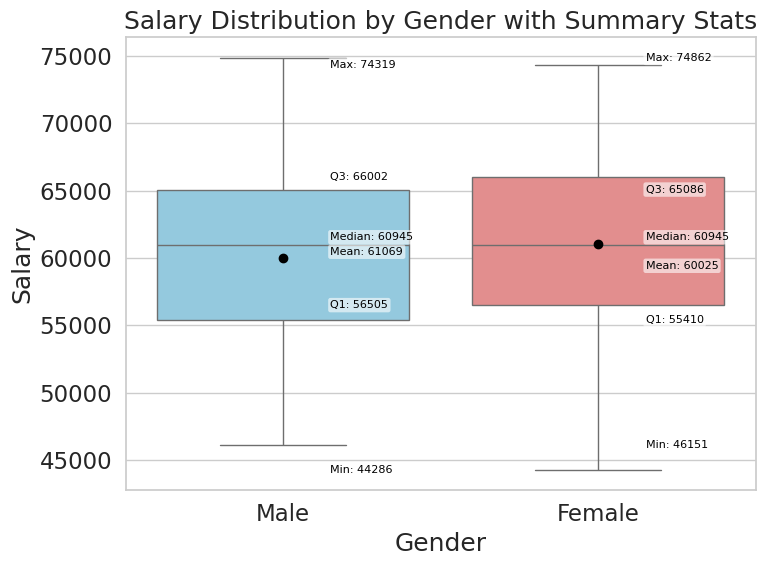

In [47]:
palette = {"Male": "skyblue",
           "Female": "lightcoral"}

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")


ax = sns.boxplot(
    data=study_df,
    x='Gender',
    y='Salary',
    hue='Gender',
    palette=palette,
    legend=False,
    showmeans=True,
    meanprops={
        "marker": "o",
        "markerfacecolor": "black",
        "markeredgecolor": "black",
        "markersize": 6
    }
)


for i, gender in enumerate(['Female', 'Male']):
    salaries = study_df[study_df['Gender'] == gender]['Salary']
    stats = {
        'Min': salaries.min(),
        'Q1': salaries.quantile(0.25),
        'Median': salaries.median(),
        'Q3': salaries.quantile(0.75),
        'Max': salaries.max(),
        'Mean': salaries.mean()
    }


    offsets = {
        'Mean': -600,     # move mean slightly up
        'Median': +600   # move median slightly down
    }

    for label, value in stats.items():
        offset = offsets.get(label, 0)
        ax.text(
            i + 0.15, value + offset,
            f'{label}: {value:.0f}',
            color='black',
            fontsize=8,
            va='center',
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.6, boxstyle='round,pad=0.2')
        )


ax.set_title("Salary Distribution by Gender with Summary Stats")
ax.set_xlabel("Gender")
ax.set_ylabel("Salary")
plt.tight_layout()
plt.show()


#### **2.4. Multiple Linear Regression with Categorical Variables**

How much would a 58-year-old man with a master’s degree typically earn?

* Salary = b0 + b1 * Age + b2 * Gender + b3 * Education
* Salary = b0 + b1 * Age + b2 * (Male + Female) + b3 * (Master+Bachelor+HighSchool)
* Salary = b0 + b1 * Age + b2 * Male + b3 * Master + b4 * No

In [48]:
favs = ['Salary', 'Age', 'Gender', 'Education']
ndf =  df.dropna(subset = favs,
          )
ndf

,Gender,Age,Place,Weight,Company,Education,JoinYear,Salary
0,Male,58.0,2.0,70.700000,GM,Master,2006.000000,74862.0
1,Female,56.0,1.0,65.900000,BMW,Master,2021.000000,60652.0
2,Male,54.0,2.0,88.900000,BMW,PhD,2011.000000,65058.0
3,Male,26.0,3.0,63.200000,Tesla,PhD,2016.000000,46284.0
4,Male,49.0,4.0,60.900000,GM,Master,2012.000000,60945.0
...,...,...,...,...,...,...,...,...
145,Male,32.0,4.0,69.500000,GM,Master,2013.000000,56127.0
146,Male,29.0,2.0,70.068889,Tesla,Master,2018.000000,51189.0
147,Male,57.0,2.0,81.400000,BMW,PhD,2010.037037,60945.0
148,Male,59.0,3.0,51.000000,BMW,Bachelor,2010.037037,65600.0


In [49]:
ndf.isnull().all()

,0
Gender,False
Age,False
Place,False
Weight,False
Company,False
Education,False
JoinYear,False
Salary,False


In [50]:
modelAGA= smf.ols("Salary ~ Age + Gender + Education",  # Salary = b0 + b1*Age + b2*Gender +  b3 * Education
                 data=ndf
                 ).fit()
modelAGA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     49.91
Date:                Fri, 30 May 2025   Prob (F-statistic):           2.37e-26
Time:                        16:11:52   Log-Likelihood:                -1467.2
No. Observations:                 150   AIC:                             2944.
Df Residuals:                     145   BIC:                             2959.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             4.15e+04   1550.212     26.773      0.000    3.84e+04    4.46e+04
Gender[T.Male]       -732.2580    721.436     -1.015      0.312   -2158.147     693.631
Education[T.Master]  2658.3725    906.855      2.931      0.004     866.010    4450.735
Education[T.PhD]     1527.2132    949.855      1.608      0.110    -350.136    3404.563
Age                   440.5978     31.469     14.001      0.000     378.400     502.796
==============================================================================
Omnibus:                        3.121   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                2.915
Skew:                           0.341   Prob(JB):                        0.233
Kurtosis:                       3.009   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion:

* Salary = b0 + b1 * Age + b2 * Gender + b3 * Education
* Salary = b0 + b1 * Age + b2 * (Male + Female) + b3 * (Master+Bachelor+ PhD)
* Salary = b0 + b1 * Age + b2 * Gender[T.Male] + b3 * Education[T.Master]	 + b4 * Education[T.PhD]

In [51]:
age = int(input("Enter the person's age:\t"))
gen = int(input("Is the person Male? (Enter 1 for Yes, 0 for No):\t"))
eduM = int(input("Does the person have a Master's degree? (1 = Yes, 0 = No):\t"))
eduP = int(input("Does the person have a PhD? (1 = Yes, 0 = No):\t"))


gender = 'Male' if gen == 1 else 'Female'
education = 'Master' if eduM == 1 else 'PhD' if eduP == 1 else 'Bachelor'


print("\n--- Profile Information ---")
print(f"Age       : {age}")
print(f"Gender    : {gender}")
print(f"Education : {education}")


predicted_val = (
    modelAG.params['Intercept']
    + modelAG.params['Age'] * age
    + modelAG.params.get('Gender[T.Male]', 0) * gen # retrieve a coefficient, default 0
    + modelAG.params.get('Education[T.Master]', 0) * eduM
    + modelAG.params.get('Education[T.PhD]', 0) * eduP
)


print("\n--- Salary Prediction ---")
print(f"Estimated salary for a {age}-year-old {gender} with {education} degree: {predicted_val:,.2f}")


fs = predicted_val


Enter the person's age:	58
Is the person Male? (Enter 1 for Yes, 0 for No):	1
Does the person have a Master's degree? (1 = Yes, 0 = No):	1
Does the person have a PhD? (1 = Yes, 0 = No):	0

--- Profile Information ---
Age       : 58
Gender    : Male
Education : Master

--- Salary Prediction ---
Estimated salary for a 58-year-old Male with Master degree: 67,739.15


In [52]:
residuals = modelAGA.resid
fitted_vals = modelAGA.fittedvalues
diff = ndf['Salary'] - fitted_vals

study_df = ndf.assign(
    PreValues=fitted_vals,
    RESI_AGA=residuals,
    difference=diff
)


study_df = study_df[
    ['Salary', 'Age', 'Gender', 'Education', 'PreValues', 'RESI_AGA', 'difference']
]

study_df


,Salary,Age,Gender,Education,PreValues,RESI_AGA,difference
0,74862.0,58.0,Male,Master,68983.993458,5878.006542,5878.006542
1,60652.0,56.0,Female,Master,68835.055935,-8183.055935,-8183.055935
2,65058.0,54.0,Male,PhD,66090.443047,-1032.443047,-1032.443047
3,46284.0,26.0,Male,PhD,53753.705530,-7469.705530,-7469.705530
4,60945.0,49.0,Male,Master,65018.613542,-4073.613542,-4073.613542
...,...,...,...,...,...,...,...
145,56127.0,32.0,Male,Master,57528.451478,-1401.451478,-1401.451478
146,51189.0,29.0,Male,Master,56206.658173,-5017.658173,-5017.658173
147,60945.0,57.0,Male,PhD,67412.236352,-6467.236352,-6467.236352
148,65600.0,59.0,Male,Bachelor,66766.218732,-1166.218732,-1166.218732


Observations:


1. The model *underestimated* the salary for this individual:

   * The person earns *\$5,878 more* than what the model predicted.
   * This is a *positive residual*, meaning the person is paid above what the regression model expects.

2. Possible reasons for the difference:

   * This individual may have *extra qualifications* or *experience* not captured by the model (e.g., industry, years of experience, certifications).
   * The model assumes a *fixed average effect* for Age, Gender, and Education - but real-world salaries vary more flexibly.

3. Model Reliability:

   * If many individuals show large residuals, the model may be *missing important predictors*.
   * This one residual alone is not enough to judge the model — but it's good practice to analyze residuals across all records.
    * Plot residuals vs. predicted values to check bias

#####  Case study:

Df Model: 4

**Case1** Age = 58, Male = True, Master = True, No = False



Profile:

* **Age:** 58 years
* **Gender:** Female
* **Education Level:** Bachelor degree



> Case 1 represents a *42-year-old female* individual with a *Bachelor degree*.

This case corresponds to the following model input values:

`Age` = 42;
`Gender` = 0 (Female is the reference category in the dummy variable `Gender[T.Male]`);
`Education[T.Master]` = 0;
`Education[T.PhD]` = 0;
Reference category for education = *Bachelor's degree*


Thus, for Case 2, the *linear model equation* used is:

$$
\hat{y} = b_0 + b_1 \cdot \text{Age} + b_2 \cdot \text{Gender[T.Male]} + b_3 \cdot \text{Education[T.Master]} + b_4 \cdot \text{Education[T.PhD]}
$$

In [53]:
age = int(input("Enter the person's age:\t"))
gen = int(input("Is the person Male? (Enter 1 for Yes, 0 for No):\t"))
eduM = int(input("Does the person have a Master's degree? (1 = Yes, 0 = No):\t"))
eduP = int(input("Does the person have a PhD? (1 = Yes, 0 = No):\t"))

gender = 'Male' if gen == 1 else 'Female'
education = 'Master' if eduM == 1 else 'PhD' if eduP == 1 else 'Bachelor'

print("\n--- Profile Information ---")
print(f"Age       : {age}")
print(f"Gender    : {gender}")
print(f"Education : {education}")

predicted_val = (
    modelAG.params['Intercept']
    + modelAG.params['Age'] * age
    + modelAG.params.get('Gender[T.Male]', 0) * gen # retrieve a coefficient, default 0
    + modelAG.params.get('Education[T.Master]', 0) * eduM
    + modelAG.params.get('Education[T.PhD]', 0) * eduP
)

print("\n--- Salary Prediction ---")
print(f"Estimated salary for a {age}-year-old {gender} with {education} degree: {predicted_val:,.2f}")
fs = predicted_val

Enter the person's age:	58
Is the person Male? (Enter 1 for Yes, 0 for No):	0
Does the person have a Master's degree? (1 = Yes, 0 = No):	0
Does the person have a PhD? (1 = Yes, 0 = No):	1

--- Profile Information ---
Age       : 58
Gender    : Female
Education : PhD

--- Salary Prediction ---
Estimated salary for a 58-year-old Female with PhD degree: 68,484.47


#### **2.5. Multiple Linear Regression with Categorical Variables (Treated as Numerical)**

We're modeling salary using a variable like `JoinYear`, which is technically numeric but represents a categorical idea (e.g., cohorts or batches).



$$
\text{Salary} = b_0 + b_1 \cdot \text{JoinYear}
$$

This equation is mathematically correct, but your interpretation depends on how `JoinYear` is treated.



1.  If `JoinYear` is used *as a numeric variable*, the model assumes a *linear trend*:

  > *Each additional year joined increases (or decreases) salary by $b_1$ units.

2.  If `JoinYear` represents *categories* (e.g., 2019, 2020, 2021), it might be better modeled as a *categorical variable* using dummy encoding:

  $$
  \text{Salary} = \beta_0 + \beta_1 \cdot \text{JoinYear}_{2020} + \beta_2 \cdot \text{JoinYear}_{2021}
  $$

  (where 2019 is the reference)

Note:

* If `JoinYear` truly has *ordinal meaning* and a *linear relationship* with salary, keep it numeric.
* If it's just grouping (like cohorts with different policies), treat it as *categorical*.

In [54]:
favs = ['Salary', 'JoinYear']
bdf = df.dropna(subset=favs)

In [55]:
modelY= sm.OLS.from_formula("Salary ~ JoinYear",  # Salary = b0 + b1*JoinYear
                               data=bdf
                               ).fit()
modelY.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     1.304
Date:                Fri, 30 May 2025   Prob (F-statistic):              0.178
Time:                        16:12:37   Log-Likelihood:                -1516.1
No. Observations:                 150   AIC:                             3080.
Df Residuals:                     126   BIC:                             3152.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      6.202e+04   2642.650     23.470      0.000    5.68e+04    6.73e+04
JoinYear[T.2001.0]            -2881.3333   3737.271     -0.771      0.442   -1.03e+04    4514.616
JoinYear[T.2002.0]              742.1667   3737.271      0.199      0.843   -6653.782    8138.116
JoinYear[T.2003.0]             3271.7917   3495.897      0.936      0.351   -3646.485    1.02e+04
JoinYear[T.2004.0]              -15.4333   3342.717     -0.005      0.996   -6630.571    6599.705
JoinYear[T.2005.0]              368.8030   3285.244      0.112      0.911   -6132.599    6870.205
JoinYear[T.2006.0]             8055.6667   5285.299      1.524      0.130   -2403.785    1.85e+04
JoinYear[T.2007.0]              597.8333   3411.646      0.175      0.861   -6153.714    7349.380
JoinYear[T.2008.0]            -5552.8333   3919.683     -1.417      0.159   -1.33e+04    2204.103
JoinYear[T.2009.0]             -403.3333   4178.396     -0.097      0.923   -8672.256    7865.589
JoinYear[T.2010.0]             -783.2619   3601.324     -0.217      0.828   -7910.177    6343.653
JoinYear[T.2010.037037037037] -2614.9667   3126.825     -0.836      0.405   -8802.862    3572.928
JoinYear[T.2011.0]            -3128.4048   3601.324     -0.869      0.387   -1.03e+04    3998.510
JoinYear[T.2012.0]             4075.1667   3737.271      1.090      0.278   -3320.782    1.15e+04
JoinYear[T.2013.0]            -3816.4333   3919.683     -0.974      0.332   -1.16e+04    3940.503
JoinYear[T.2014.0]            -3949.5000   3737.271     -1.057      0.293   -1.13e+04    3446.449
JoinYear[T.2015.0]            -4859.8333   6991.793     -0.695      0.488   -1.87e+04    8976.720
JoinYear[T.2016.0]            -2576.0333   3919.683     -0.657      0.512   -1.03e+04    5180.903
JoinYear[T.2017.0]            -3153.3333   4178.396     -0.755      0.452   -1.14e+04    5115.589
JoinYear[T.2018.0]            -4672.4048   3601.324     -1.297      0.197   -1.18e+04    2454.510
JoinYear[T.2019.0]            -4522.5000   3737.271     -1.210      0.229   -1.19e+04    2873.449
JoinYear[T.2020.0]            -8586.1667   4577.203     -1.876      0.063   -1.76e+04     471.984
JoinYear[T.2021.0]              503.1667   3737.271      0.135      0.893   -6892.782    7899.116
JoinYear[T.2022.0]            -4088.0333   3919.683     -1.043      0.299   -1.18e+04    3668.903
==============================================================================
Omnibus:                        1.135   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.567   Jarque-Bera (JB):                1.109
Skew:                          -0.077   Prob(JB):                        0.574
Kurtosis:                       2.608   Cond. No.                         25.8
==========================================

Here, Df Model:	22.
So we need at least 22 information we need to predict the salary. Thus, to be more easy to understand, we make the data frame, a bit smaller.

In [56]:
cdf = df.head(8)
len(cdf.JoinYear.unique())

8

In [57]:
cdf['JoinYear'] = cdf['JoinYear'].astype(float).round().astype(int).astype('category')
cdf.dtypes

<ipython-input-57-0a13f4139d1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['JoinYear'] = cdf['JoinYear'].astype(float).round().astype(int).astype('category')


,0
Gender,object
Age,float64
Place,category
Weight,float64
Company,object
Education,object
JoinYear,category
Salary,float64


In [58]:
cdf

,Gender,Age,Place,Weight,Company,Education,JoinYear,Salary
0,Male,58.000000,2.0,70.7,GM,Master,2006,74862.0
1,Female,56.000000,1.0,65.9,BMW,Master,2021,60652.0
2,Male,54.000000,2.0,88.9,BMW,PhD,2011,65058.0
3,Male,26.000000,3.0,63.2,Tesla,PhD,2016,46284.0
4,Male,49.000000,4.0,60.9,GM,Master,2012,60945.0
5,Female,28.000000,1.0,65.4,Ford,Master,2019,51910.0
6,Male,40.404255,4.0,65.9,Ford,Master,2003,56713.0
7,Male,29.000000,2.0,76.0,Tesla,Bachelor,2009,50704.0


In [59]:
years = cdf.JoinYear.unique()
years

[2006, 2021, 2011, 2016, 2012, 2019, 2003, 2009]
Categories (8, int64): [2003, 2006, 2009, 2011, 2012, 2016, 2019, 2021]

In [60]:
modelYc= smf.ols("Salary ~ JoinYear",  # Salary = b0 + b1*JoinYear
                               data=cdf
                               ).fit()
modelYc.summary()

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 30 May 2025   Prob (F-statistic):                nan
Time:                        16:12:37   Log-Likelihood:                 182.58
No. Observations:                   8   AIC:                            -349.2
Df Residuals:                       0   BIC:                            -348.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5.671e+04        inf          0        nan         nan         nan
JoinYear[T.2006]  1.815e+04        inf          0        nan         nan         nan
JoinYear[T.2009] -6009.0000        inf         -0        nan         nan         nan
JoinYear[T.2011]  8345.0000        inf          0        nan         nan         nan
JoinYear[T.2012]  4232.0000        inf          0        nan         nan         nan
JoinYear[T.2016] -1.043e+04        inf         -0        nan         nan         nan
JoinYear[T.2019] -4803.0000        inf         -0        nan         nan         nan
JoinYear[T.2021]  3939.0000        inf          0        nan         nan         nan
==============================================================================
Omnibus:                        8.715   Durbin-Watson:                   0.376
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                2.794
Skew:                           1.360   Prob(JB):                        0.247
Kurtosis:                       3.990   Cond. No.                         8.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
cdf.JoinYear.unique() # took the first year 2003 as baseline

[2006, 2021, 2011, 2016, 2012, 2019, 2003, 2009]
Categories (8, int64): [2003, 2006, 2009, 2011, 2012, 2016, 2019, 2021]

In [62]:
params = modelYc.params

print("Regression Model: Salary  = b0 + b1*JoinYear\t (base year: 2003)")
print("Predicted Salary =")

# Display Intercept first
intercept = params['Intercept']
print(f"  {intercept:10.2f} + ")

# Loop over dummy variables
for param_name, param_value in params.items():
    if param_name != 'Intercept':
        print(f"  {(param_value):10.2f} * {param_name} ")

print("\nNote: Only one JoinYear dummy is 1 at prediction time (the rest are 0).\n")


Regression Model: Salary  = b0 + b1*JoinYear	 (base year: 2003)
Predicted Salary =
    56713.00 + 
    18149.00 * JoinYear[T.2006] 
    -6009.00 * JoinYear[T.2009] 
     8345.00 * JoinYear[T.2011] 
     4232.00 * JoinYear[T.2012] 
   -10429.00 * JoinYear[T.2016] 
    -4803.00 * JoinYear[T.2019] 
     3939.00 * JoinYear[T.2021] 

Note: Only one JoinYear dummy is 1 at prediction time (the rest are 0).



In [63]:
pred06 = 56713 + 18149 * 1 - 6009 * 0  + 8345 * 0  + 4232 * 0  - 10429 * 0  -4803 * 0  + 3939 * 0
pred03 = 56713 + 18149 * 0 - 6009 * 0  + 8345 * 0  + 4232 * 0  - 10429 * 0  -4803 * 0  + 3939 * 0
print(f'Salary of a person Joined in 2006 is \t:  {pred06}')
print(f'Salary of a person Joined in 2003 is \t:  {pred03}')
print(f'The difference is \t: {pred06 - pred03}\t, the coefficient of 2006 is {18149}')

Salary of a person Joined in 2006 is 	:  74862
Salary of a person Joined in 2003 is 	:  56713
The difference is 	: 18149	, the coefficient of 2006 is 18149


Observations:



$$
\text{Salary} = b_0 + b_1 \cdot \text{JoinYear}[T.2006] + b_2 \cdot \text{JoinYear}[T.2009] + \ldots
$$

* `b0 = 56713`: This is the estimated average salary for someone who joined in the *baseline year 2003*.
* All other coefficients represent the *difference in salary* compared to 2003.

Specific Case Compared:

* **JoinYear = 2006**: `Salary = 56713 + 18149 = 74862`
* **JoinYear = 2003**: `Salary = 56713`
* **Difference**: `74862 - 56713 = 18149`



1. Baseline Year Reference:

   * 2003 is the reference category (its effect is absorbed in the intercept).
   * All other year coefficients are interpreted *relative to 2003*.

2. Positive Effect in 2006:

   * A person who joined in *2006* is estimated to earn *\$18,149 more* than one who joined in 2003.
    * This suggests *higher salary levels* associated with 2006 joiners.

3. Model Interpretation is Additive:

   * Only the dummy corresponding to the actual `JoinYear` contributes to the prediction.
    * All others are multiplied by 0.

### Regression Models with Interactions

1. What is an interaction term in a regression model?

  An interaction term in a regression model captures the combined effect of two (or more) predictors on the response variable.
    - While main effects measure the independent influence of each predictor on the outcome, an interaction term shows how the effect of one predictor depends on the level of the other predictor.

For example:
- If `Gender` and `Education` are main effects, they independently influence `Salary`.
- An interaction between `Gender` and `Education` (`Gender × Education`) captures whether the effect of `Education` on `Salary` differs by `Gender`.



2. Why is interaction important in a model?

  Interaction terms are relevant when there is *evidence* or *suspicion of dependency between predictors* in their influence on the response variable.

  2.1. Improved Model Accuracy
  
  If an interaction exists but is not included in the model, the predictions and estimates may be biased. Including interaction terms can help model the relationship more accurately.

  2.2. Improved Interpretation
  
  Interactions allow for a nuanced understanding of how predictors jointly influence the outcome.
  
  For instance:
    - The salary gap between genders might vary depending on education level.

  2.3. Testing Hypotheses
  
  Interaction terms help test hypotheses like:
  - "Does the impact of `Education` on `Salary` differ for males versus females?"



3. When should you include an interaction term?

  3.1. Domain Knowledge or Theory:
   - If prior research or theoretical understanding suggests that the predictors influence each other’s effects on the response variable, you should include interaction terms.
    - Eg: In a salary analysis, you might expect `Education` to have a stronger effect on salaries for males than females.

  3.2. Exploratory Data Analysis:
   - If scatterplots or preliminary analyses suggest that the relationship between one predictor and the response varies by levels of another predictor, include interaction terms.

  3.3. Statistical Tests:
   - Use an ANOVA or a likelihood ratio test to determine whether adding the interaction term significantly improves the model.

  3.4. Complex Dependencies:
   - When you suspect that the predictors do not act independently but instead amplify or diminish each other’s effects.

4. When should you avoid interaction terms?

  4.1. Insufficient Data:
   - Interaction terms require more data to estimate accurately.
    - If your dataset is small, adding interaction terms can lead to overfitting or unreliable estimates.

  4.2. Irrelevance:
   - If domain expertise or data analysis provides no evidence of interaction, including it adds unnecessary complexity.

  4.3. Multicollinearity:
   - Interactions between highly correlated variables can inflate standard errors, making estimates less reliable.

5. How do you interpret an interaction term?

Consider the model:  

$$
\text{Salary} = b_0 + b_1(\text{Gender}) + b_2(\text{Education}) + b_3(\text{Gender} \times \text{Education}) + \varepsilon
$$

- $b_0$: Baseline Salary (when Gender and Education are at their reference levels).
- $b_1$: Effect of `Gender` on Salary when `Education` is at the reference level.
- $b_2$: Effect of `Education` on Salary when `Gender` is at the reference level.
- $b_3$: The interaction term that indicates how the effect of `Gender` on `Salary` changes with `Education` (or vice versa).

  Eg:  If

$$\text{Salary} = 30 + 5(\text{Gender: Male}) + 3(\text{Education: Master's}) - 2(\text{Male} \times \text{Master's})$$

- Males with a Master’s degree would earn \(30 + 5 + 3 - 2 = 37\).
- Females with a Master’s degree would earn \(30 + 3 = 33\).

  The interaction term -2 shows that the boost in Salary due to Education is smaller for males compared to females.

6. Practical Example of Relevance

  Imagine you’re analyzing the effect of `Exercise` and `Diet` on weight loss:
  - Main effects:
    - `Exercise`: People who exercise lose more weight.
    - `Diet`: People on a calorie-restricted diet lose more weight.
  - Interaction:
    - The effect of `Exercise` might be *stronger* for people who are on a calorie-restricted diet.

  Without an interaction term, the model assumes the effects of `Exercise` and `Diet` are independent, missing the synergistic effect.

In a nutshell:
  1. *Use interaction terms* when there is theoretical or empirical evidence of dependency between predictors.
  2. *Avoid blindly adding interaction terms* without justification to prevent overfitting or misinterpretation.
  3. *Interpretation* of interaction terms requires understanding how the effect of one predictor changes based on the level of another.

Adding interaction terms transforms a basic model into one that captures the complexity of real-world relationships effectively.

In [64]:
df.head()

,Gender,Age,Place,Weight,Company,Education,JoinYear,Salary
0,Male,58.0,2.0,70.7,GM,Master,2006.0,74862.0
1,Female,56.0,1.0,65.9,BMW,Master,2021.0,60652.0
2,Male,54.0,2.0,88.9,BMW,PhD,2011.0,65058.0
3,Male,26.0,3.0,63.2,Tesla,PhD,2016.0,46284.0
4,Male,49.0,4.0,60.9,GM,Master,2012.0,60945.0


Model Without Interaction:

$$
\text{Salary} = b_0 + b_1 \cdot \text{Gender} + b_2 \cdot \text{Education} + \varepsilon
$$

In [65]:
df['Gender'] = df['Gender'].astype('category')
df['Education'] = df['Education'].astype('category')
df[['Gender', 'Education']].isnull().sum()

,0
Gender,0
Education,0


In [66]:
model_basic = smf.ols('Salary ~ Gender + Education',
                      data=df).fit()
print(model_basic.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5141
Date:                Fri, 30 May 2025   Prob (F-statistic):              0.673
Time:                        16:12:37   Log-Likelihood:                -1531.3
No. Observations:                 150   AIC:                             3071.
Df Residuals:                     146   BIC:                             3083.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            6.031e+04   1

Add Interaction Term:

$$
\text{Salary} = b_0 + b_1 \cdot \text{Gender} + b_2 \cdot \text{Education} + b_3 \cdot (\text{Gender} \times \text{Education}) + \varepsilon
$$

In [67]:
model_interaction = smf.ols('Salary ~ Gender * Education', data=df).fit()
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.181
Date:                Fri, 30 May 2025   Prob (F-statistic):              0.321
Time:                        16:12:37   Log-Likelihood:                -1529.1
No. Observations:                 150   AIC:                             3070.
Df Residuals:                     144   BIC:                             3088.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [68]:
model_interaction.params.round(0)

,0
Intercept,58842.0
Gender[T.Male],2575.0
Education[T.Master],2588.0
Education[T.PhD],3534.0
Gender[T.Male]:Education[T.Master],-3828.0
Gender[T.Male]:Education[T.PhD],-6052.0


Suppose, for easy understanding:

* `Intercept = 500` (baseline: Female + PhD),
* `Gender[T.Male] = 20`,
* `Education[T.Master] = 30`,
* `Gender[T.Male]:Education[T.Master] = -15`

Then:

* A female with PhD: 500
* A male with PhD: 500 + 20 = 520
* A female with Master’s: 500 + 30 = 530
* A male with Master’s: 500 + 20 + 30 - 15 = 535

The *interaction* term `-15` shows that the *added value of having a Master’s* is *smaller for males* by \$1500 compared to females.



Compare Models:

  Use ANOVA to test if the interaction improves the model significantly:

  -  If the p-value is **< 0.05**, the interaction term improves the model fit significantly.

In [69]:
from statsmodels.stats.anova import anova_lm
anova_lm(model_basic, model_interaction)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,146.0,6.468061e+09,0.0,NaN,NaN,NaN
1,144.0,6.278807e+09,2.0,1.892534e+08,2.170196,0.117875


| Term      | Value        | Meaning                                                              |
| --------- | ------------ | -------------------------------------------------------------------- |
| `df_diff` | 2.0          | 2 degrees of freedom were used to add the interaction terms          |
| `ss_diff` | 1.89 × 10⁸   | Reduction in residual sum of squares (SSR) when interaction is added |
| `F`       | 2.17         | F-statistic for testing whether the interaction improves the model   |
| `Pr(>F)`  | **0.117875** | p-value for the F-test                                               |


  The *p-value = 0.1179 >  0.05*.

  * This means that adding the interaction between `Gender` and `Education` *does not significantly improve* the model at the 5% significance level.

Conclusion:

> We do *not* have enough evidence to keep the interaction term in our regression model.
  - Stick with the simpler model: `Salary ~ Gender + Education`.

This doesn't mean the interaction has zero effect — just that it’s not *statistically significant* in your current sample.


- `Gender * Education`  -  How the effect of `Education` differs between `Genders`
- `model_basic` vs `model_interaction` -  Helps test if the interaction term adds predictive power


## Assumptions of Linear Regression

$$
\text{Salary} = \beta_0 + \beta_1 \cdot \text{Age} + \beta_2 \cdot \text{Gender} + \beta_3 \cdot \text{Education} + \varepsilon
$$


Summary: What to Check

| Assumption            | Tool/Plot/Test       | Acceptable Range / Shape       |
| --------------------- | -------------------- | ------------------------------ |
| **Linearity**         | Residuals vs Fitted  | No curve                       |
| **Independence**      | Durbin-Watson        | 1.5–2.5                        |
| **Homoscedasticity**  | Scale-Location Plot  | No funnel                      |
| **Normality**         | Histogram & Q-Q Plot | Bell shape / close to 45° line |
| **Multicollinearity** | VIF                  | < 5 preferred                  |
| **Influence**         | Cook's Distance      | Cook’s D < 1                   |


In [70]:
modelAGA= smf.ols("Salary ~ Age + Gender + Education",  # Salary = b0 + b1*Age + b2*Gender +  b3 * Education
                 data=df
                 ).fit()
modelAGA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     49.91
Date:                Fri, 30 May 2025   Prob (F-statistic):           2.37e-26
Time:                        16:12:37   Log-Likelihood:                -1467.2
No. Observations:                 150   AIC:                             2944.
Df Residuals:                     145   BIC:                             2959.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             4.15e+04   1550.212     26.773      0.000    3.84e+04    4.46e+04
Gender[T.Male]       -732.2580    721.436     -1.015      0.312   -2158.147     693.631
Education[T.Master]  2658.3725    906.855      2.931      0.004     866.010    4450.735
Education[T.PhD]     1527.2132    949.855      1.608      0.110    -350.136    3404.563
Age                   440.5978     31.469     14.001      0.000     378.400     502.796
==============================================================================
Omnibus:                        3.121   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                2.915
Skew:                           0.341   Prob(JB):                        0.233
Kurtosis:                       3.009   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To validate this model, you must check that the *classical linear regression assumptions* are satisfied. Here's a step-by-step diagnostic checklist:


### 1. Linearity : Relationship between predictors (`Age`, `Gender`, `Education`) and `Salary` should be linear.

  - Interpretation: The red line should be approximately flat (horizontal).
  - If it's curved: Relationship may be nonlinear -  consider polynomial terms or transformations.

In [71]:
plt.style.available
plt.style.use('ggplot')

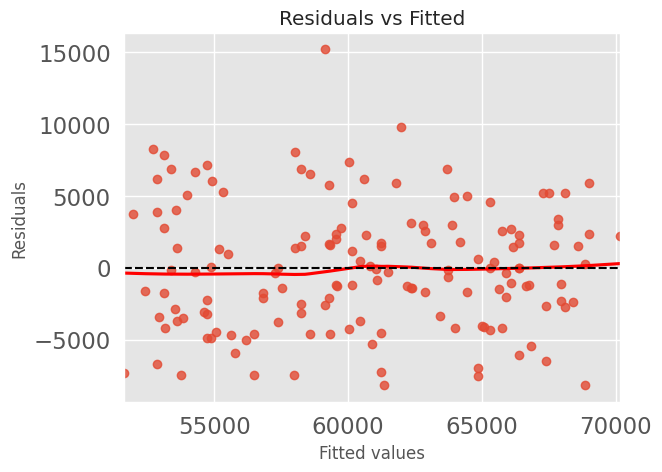

In [72]:
fitted_vals = modelAGA.fittedvalues
residuals = modelAGA.resid

sns.residplot(x=fitted_vals,
              y=residuals,
              lowess=True,
              line_kws={'color': 'red'} #Keyword arguments to style the smoothing line
              )

plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.axhline(0, color='black', linestyle='--')
plt.show()

It fits and draws a *LOWESS (LOcally WEighted Scatterplot Smoothing) smoothing line* (a flexible, non-parametric regression) through the **residuals**.
* That red line shows the *average trend of residuals across predicted values*.

Observation:

1.Linearity check:

   * If the model is correctly specified and linear, this red line should be *flat and close to 0*.
    * A *curved red line* suggests a *nonlinear relationship* - the model may be missing interaction terms, polynomial terms, or a transformation.

2. Homoscedasticity check:

   * We want the *spread of residuals* around the red line to be *roughly constant* across the plot.
    * If residuals *fan out* or *narrow in*, it suggests *heteroscedasticity* (non-constant variance), violating a key regression assumption.


In a nutsehll :
If the *red line is not flat*, the model likely needs to be revised.

Interpretation of the Plot:

  * Red Line = LOWESS smoothing line

  * Dashed Black Line = Zero-residual baseline


1. LOWESS Line is nearly flat and close to zero:

   * This suggests the *linearity assumption holds*.
   * No strong evidence of systematic nonlinearity in the residuals.

2. Residuals are scattered randomly around zero:

   * This is what we want.
    - It indicates that the model’s errors are balanced - not underestimating or overestimating in any particular range of fitted values.

3. No clear funnel or pattern in the spread of residuals:

   * Suggests *homoscedasticity* — constant variance of residuals across predictions.

Conclusion:

* This is a *well-behaved residual plot* for a linear regression model.

* The model appears to satisfy:

  1. Linearity
  2. Zero-mean residuals
  3. Constant variance (homoscedasticity)


### 2. Independence of Errors -  Residuals should not be autocorrelated.

How to check  ?
  - Durbin-Watson Test
    - Rule of thumb:
      * `≈ 2.0` -  Residuals are uncorrelated (good)    
      * `< 1.5` -  Possible *positive autocorrelation*
      * `> 2.5` -  Possible *negative autocorrelation*

In [73]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(modelAGA.resid)
print("Durbin-Watson:", dw)

Durbin-Watson: 1.8342612920531935


Very close to 2.0. So:
  * No serious autocorrelation
    - A slight positive correlation may exist, but it's *not enough to worry* about unless your model is part of a *time series*.

  * Well-behaved residuals in terms of independence.
    * This supports the *validity of our model’s inference* (e.g., confidence intervals and p-values).

Potential Confusions (Clarified):

1. Is 1.83 a concern
    -  Not really. Unless we're in time series or spatial modeling, **DW between 1.7 and 2.3 is acceptable**.

2. Does DW detect heteroscedasticity?
    - No. It only checks *autocorrelation* (whether residuals are dependent on previous ones).
      - Use other tests (like Breusch-Pagan) for heteroscedasticity.

3. Can DW be used if you have categorical variables?
    - Yes. DW is applicable to any OLS model, but it's *most powerful in time-ordered data*.

In a nutshell:
  - Durbin-Watson =  1.83  -> Residuals are **independent**  

### 3. Homoscedasticity (Constant Variance)

Check: Variance of residuals should be constant across all levels of predicted values.

How to check: Same *Residuals vs Fitted Plot* as above.

Also, we can use - Scale-Location Plot:

  - In which, spread should be constant.
  - If fan or funnel shape - heteroscedasticity.
    - Then consider transformations or weighted regression.

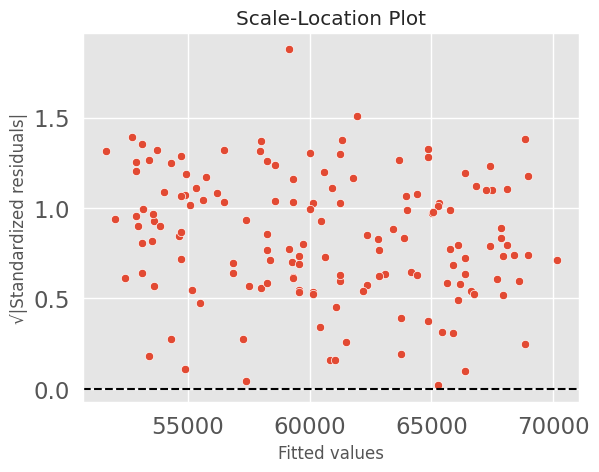

In [74]:
standardized_residuals = modelAGA.get_influence().resid_studentized_internal
sns.scatterplot(x=fitted_vals,
                y=np.sqrt(np.abs(standardized_residuals))
                )

plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("√|Standardized residuals|")
plt.title("Scale-Location Plot")
plt.show()

Interpretation of Your Plot

  * X-axis: Fitted values (predicted salaries).
  * Y-axis:  the square root of the absolute value of the standardized residual for that observation.
    - this transformation makes spread differences easier to detect.
  * Each dot: corresponds to a single observation in the dataset.
  * You’re checking whether the *spread of the residuals* is *roughly constant* across all levels of fitted values.

Observvations:
  * The red dots are fairly evenly scattered, and the spread is consistent across the fitted values.
  * No funnel shape, such as increasing or decreasing spread - that’s good.
  * No visible curve or cluster indicating model misfit in certain ranges.


Conclusion:

  * Homoscedasticity assumption is satisfied.

### 4. Normality of Residuals

Check: Residuals should be approximately normally distributed.

How to check:
  - Histogram should look bell-shaped;
    - Q-Q plot should follow the 45° line.
  - Deviations at tails - potential non-normality (may affect p-values).


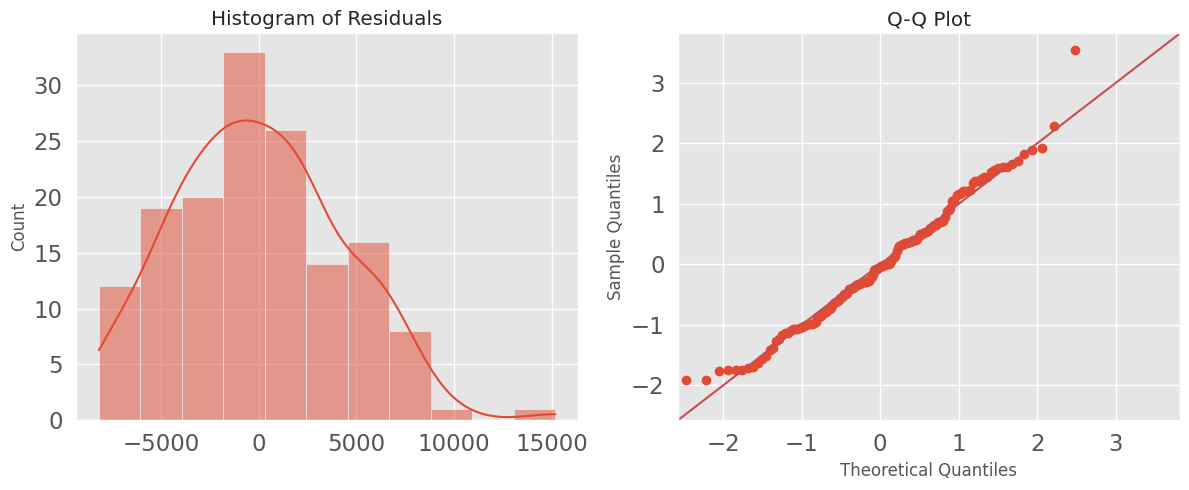

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


sns.histplot(residuals,
             kde=True,
             ax=axes[0]
             )

sm.qqplot(residuals,
          line='45',
          fit=True,
          ax=axes[1]
          )

axes[0].set_title("Histogram of Residuals")
axes[1].set_title("Q-Q Plot")

plt.tight_layout()
plt.show()

Interpretation & Observations :

Left Plot: Histogram of Residuals:
  * The residuals appear *approximately normally distributed*.
  * The *KDE (smooth curve)* follows a normal distribution reasonably well.
  * There is a *small right skew* (tail on the right), which is reflected in a few high positive residuals.
    - The small skew is not extreme, and likely won't impact inference significantly unless the sample is very small or we're dealing with extreme outliers.


Right Plot: Q-Q Plot (Quantile-Quantile):
  * Most points fall *along the 45° red line*, especially in the center.
  * *Deviations appear in the tails*, especially:
    * Slight downward curve on the left
    * A few points above the line on the top right (suggesting *positive outliers*)

  * The mild *departure at the extremes* is common and not usually a major issue if:
    * Residuals are independent
    * Variance is constant
    * The sample size is reasonably large.

In a nutshell:

- Histogram shape - Roughly symmetric  - Normality is plausible.
- Q-Q Line fit - Mostly on 45° line - Good alignment with normal distribution.
- Tail behavior   - Mild deviations    - Slight skew and a few outliers (not alarming)
- *No immediate need* to transform residuals or modify the model.
- We *may flag or inspect* the top few residual outliers for leverage or influence.

### 5. No Multicollinearity

Check: Predictors should not be too highly correlated.

How to check (VIF):
  * `VIF < 5` - no multicollinearity
  * `VIF > 10` - serious multicollinearity
    - consider dropping or combining variables

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y, X = dmatrices("Salary ~ Age + Gender + Education",
                 data=df,
                 return_type='dataframe'
                 )

vif_df = pd.DataFrame()

vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_df["Variable"] = X.columns

print(vif_df)

         VIF             Variable
0  19.005743            Intercept
1   1.002710       Gender[T.Male]
2   1.591015  Education[T.Master]
3   1.569466     Education[T.PhD]
4   1.019526                  Age


VIF Results Summary:
  - Intercept -  19.005743  - Often high, but can be ignored for collinearity concerns
  - Gender\[T.Male] -  1.002710  -  No multicollinearity.
  - Education\[T.Master]-  1.591015  -  Low correlation with others
  - Education\[T.PhD] - 1.569466 - Low correlation with others
  - Age - 1.019526  - No  multicollinearity

Observations:

1. All VIFs are well below 5 (a common threshold for concern).
   
    - This indicates that *none of the predictors are strongly linearly related* to each other.

2. Intercept has a high VIF:

   * This is *normal and expected*, especially when dummy variables are involved.
   * VIF for intercept is *not a concern* in multicollinearity diagnostics.

3. Education dummies (`T.Master`, `T.PhD`) have VIFs \~1.5:

   * Very reasonable - suggests *mild correlation*, but no issue.

4. Gender and Age VIFs ≈ 1.0:

   * These variables are essentially *orthogonal* to the others (no correlation).

Conclusion:

  - The model *does not suffer from multicollinearity*.
  - We can *trust the stability* of your estimated coefficients and their standard errors.
  - No need to drop or combine variables.

###  6. Outliers & Influence

How to check influential points (Cook’s Distance):


| Criterion               | Result        | Interpretation                       |
| ----------------------- | ------------- | ------------------------------------ |
| Any Cook’s D > 1        | If yes, Bad       | Highly influential points         |
| General shape of values | Mostly near 0 | Balanced data                        |
| Model stability         | Safe        | Regression coefficients are reliable |

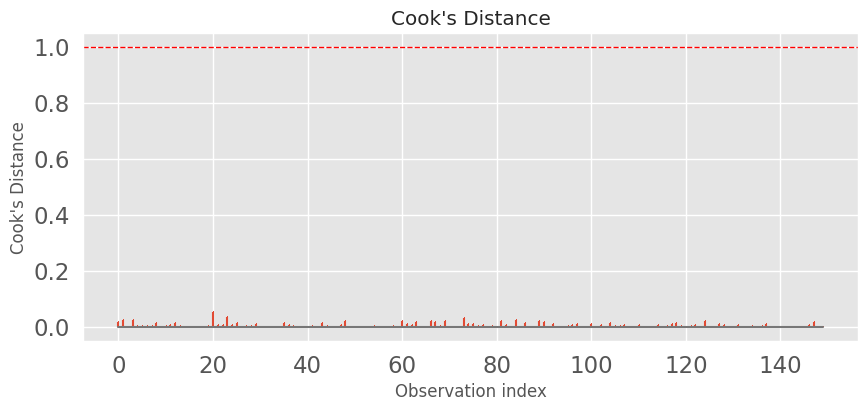

In [77]:
influence = modelAGA.get_influence()
(c, p) = influence.cooks_distance

plt.figure(figsize=(10, 4))
plt.stem(np.arange(len(c)), c, markerfmt=",")  # <- fixed line
plt.title("Cook's Distance")
plt.xlabel("Observation index")
plt.ylabel("Cook's Distance")
plt.axhline(1, color='red', linestyle='--', linewidth=1)
plt.show()

Interpretation:

* X-axis: Observation index (each data point).
* Y-axis: Cook’s D value - measures *how much an observation influences the fitted regression model*.
* Red dashed line at D = 1: Standard threshold. Observations *above this line* are considered *potentially influential*.



Observations:

1. No points exceed the red line at D = 1:

   * This suggests that *none of the data points have undue influence* on the regression model.
   * The model’s parameter estimates are *not being distorted* by any individual observation.

2. Most Cook’s D values are *very close to zero*:

   * Indicates a *well-balanced dataset* with *no major outliers in leverage and residual combination*.

Conclusion:

The regression model appears *robust* with respect to outliers and influential data points.

<!--NAVIGATION-->
< [previous](prev) | [Contents](toc.ipynb) | [next](https://github.com/Egade/notes/blob/main/81_LinearRegression.ipynb) >